In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#READ DATA
data = pd.read_csv("C:\\Users\\USER\\Desktop\\New Research\\dataset.csv", encoding='ISO-8859-1')

data.head(10)

,label,Text
0,1,@polythenespam I will be all packed for rehab....
1,1,Sorry if you at having trouble viewing my stor...
2,1,Ah! My pc is so bad to me!!!
3,1,"@kstew_fan No shade, still all old! And you h..."
4,1,Our phone line is dead.
5,1,Spending my last days in Washington with the b...
6,0,http://twitpic.com/6ivhj - Demi...ÃÂ¢ÃÂÃÂ¥...
7,1,"@missxseptemberk nope, because then I'd miss m..."
8,0,@JillzWorth its sooooooooo gone i feel so a...
9,1,lost ma phone... man this is da worst bday wee...


In [3]:
sample_data = data.sample(150000,replace=True, random_state=1)
X = sample_data['Text']
y = sample_data['label']

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import string
import re

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import nltk
nltk.data.path.append("C:/Users/Asus/nltk_data")  # Update the path if you’ve placed nltk_data elsewhere


In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
import re
import string
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
from collections import Counter

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Stopwords set (combining NLTK and spaCy stopwords)
stop_words = frozenset(stopwords.words('english')).union(spacy_stopwords)

# Dictionary of contractions and their expanded forms
abbreviation_map = {
    "isn't": "is not", "aren't": "are not", "can't": "cannot",
    "couldn't": "could not", "don't": "do not", "doesn't": "does not",
    "n't": "not", "'re": "are", "'ve": "have", "'ll": "will",
    "'d": "would", "'s": "is"
}

# Enhanced data cleaning function
def clean_text(text):
    # Convert to lowercase and handle abbreviations
    text = text.lower()
    for short_form, full_form in abbreviation_map.items():
        text = re.sub(rf"\b{re.escape(short_form)}\b", full_form, text)
    
    # Combine all regex replacements into a single call
    text = re.sub(
        r'http\S+|www\S+|https\S+|'        # URLs
        r'\b\w+@\w+\.\w+\b|'               # Emails
        r'@\w+|#\w+|'                      # Hashtags and mentions
        r'\d+|'                            # Digits
        r'[^\x00-\x7F]+|'                  # Non-English symbols
        r'\s+', ' ',                       # Excessive whitespace
        text
    )
    
    # Remove punctuation and trim whitespace
    return text.translate(str.maketrans('', '', string.punctuation)).strip()

# Tokenize, lemmatize, and filter by POS and stopwords in one step
def process_and_filter_text(text):
    tokens = word_tokenize(text)
    pos_tagged = pos_tag(tokens)
    filtered_words = []
    
    for word, tag in pos_tagged:
        # Exclude stopwords and unwanted POS tags (e.g., prepositions and conjunctions)
        if word in stop_words or tag in {'IN', 'CC'}:
            continue
        
        # Determine POS and lemmatize accordingly
        if tag.startswith('NN'):
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            lemma = lemmatizer.lemmatize(word, pos='a')
        elif tag.startswith('RB'):
            lemma = lemmatizer.lemmatize(word, pos='r')
        else:
            lemma = lemmatizer.lemmatize(word)
        
        filtered_words.append((lemma, tag))  # Append word with POS tag if it passes all filters
    
    return filtered_words

# Full data cleaning and preprocessing pipeline
def preprocess_data(text):
    cleaned_text = clean_text(text)
    return process_and_filter_text(cleaned_text)

# Apply the preprocessing function to the dataset
data = pd.read_csv("C:\\Users\\USER\\Desktop\\New Research\\dataset.csv")
data['Cleaned_Text_POS'] = data['Text'].apply(preprocess_data)

# Filter negative samples and analyze POS tags
negative_data = data[data['label'] == 1]

# Collect POS tags of words in negative texts
pos_tags_negative = Counter()
for row in negative_data['Cleaned_Text_POS']:
    pos_tags_negative.update(tag for _, tag in row)

# Display the most common POS tags associated with negative words
print("Most common POS tags in negative words:")
print(pos_tags_negative.most_common(10))

# Remove the POS tags to retain only the cleaned text for other uses
data['Cleaned_Text'] = data['Cleaned_Text_POS'].apply(lambda x: ' '.join(word for word, _ in x))

# Display the first 20 rows of the cleaned dataset with POS analysis
print(data.head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most common POS tags in negative words:
[('NN', 279060), ('JJ', 98524), ('VB', 51556), ('NNS', 50896), ('VBP', 39925), ('VBG', 37556), ('VBD', 28735), ('RB', 26769), ('VBN', 19943), ('VBZ', 13296)]
    label                                               Text  \
0       1  @polythenespam I will be all packed for rehab....   
1       1  Sorry if you at having trouble viewing my stor...   
2       1                      Ah! My pc is so bad to me!!!    
3       1  @kstew_fan No shade, still all old!  And you h...   
4       1                           Our phone line is dead.    
5       1  Spending my last days in Washington with the b...   
6       0  http://twitpic.com/6ivhj - Demi...Ã¢ÂÂ¥Ã¢ÂÂ¥...   
7       1  @missxseptemberk nope, because then I'd miss m...   
8       0  @JillzWorth its sooooooooo gone    i feel so a...   
9       1  lost ma phone... man this is da worst bday wee...   
10      0  @revjesse @TipSquirrel Haha... if I ruled the ...   
11      1  Not been tweeting much 

Most common POS tags in negative words:
NN: 279060
JJ: 98524
VB: 51556
NNS: 50896
VBP: 39925
VBG: 37556
VBD: 28735
RB: 26769
VBN: 19943
VBZ: 13296
CSV file saved as pos_tags_negative_words.csv


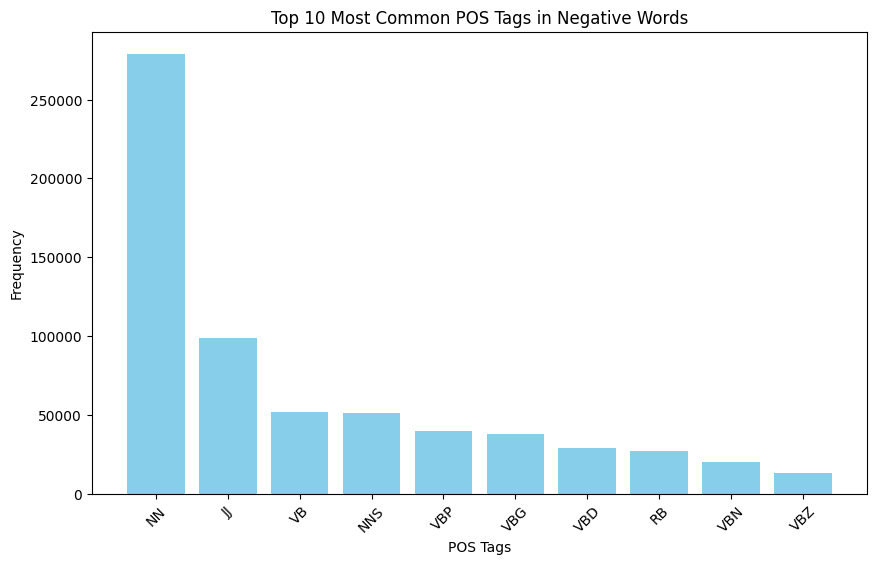

In [9]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming `negative_data` is already defined and contains rows with 'label' == 1
# and `Cleaned_Text_POS` is a list of tuples [(word, POS_tag), ...]

# Collect POS tags from negative samples
pos_tags_negative = Counter()
for row in negative_data['Cleaned_Text_POS']:
    pos_tags_negative.update(tag for _, tag in row)

# Display the most common POS tags with their counts
print("Most common POS tags in negative words:")
for tag, count in pos_tags_negative.most_common(10):
    print(f"{tag}: {count}")

# Convert to DataFrame for easier plotting and saving
pos_tag_df = pd.DataFrame(pos_tags_negative.most_common(10), columns=['POS_Tag', 'Count'])

# Save the DataFrame to a CSV file
pos_tag_df.to_csv("pos_tags_negative_words.csv", index=False)
print("CSV file saved as pos_tags_negative_words.csv")

# Plotting the POS tag distribution for negative words
plt.figure(figsize=(10, 6))
plt.bar(pos_tag_df['POS_Tag'], pos_tag_df['Count'], color='skyblue')
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common POS Tags in Negative Words")
plt.xticks(rotation=45)
plt.show()


In [9]:
pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from collections import defaultdict
import xlsxwriter

# Dictionary to store unique words per POS tag
unique_words_by_pos = defaultdict(set)

# Extract unique words per POS tag from negative samples
for row in negative_data['Cleaned_Text_POS']:
    for word, tag in row:
        unique_words_by_pos[tag].add(word)

# Find the maximum length among POS tags
max_length = max(len(words) for words in unique_words_by_pos.values())

# Pad each POS tag list with None to make all columns equal in length
padded_unique_words = {tag: list(words) + [None] * (max_length - len(words)) for tag, words in unique_words_by_pos.items()}

# Convert to DataFrame for saving to Excel
unique_words_df = pd.DataFrame(padded_unique_words)

# Save to Excel file
excel_path = "unique_words_by_pos_tag_negative.xlsx"
with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
    unique_words_df.to_excel(writer, sheet_name="Unique_Words_By_POS", index=False)

print(f"Excel file saved as {excel_path}")


Excel file saved as unique_words_by_pos_tag_negative.xlsx


In [11]:
import pandas as pd
from collections import defaultdict, Counter
import xlsxwriter

# Dictionary to store unique words per POS tag
unique_words_by_pos = defaultdict(set)

# Extract unique words per POS tag from negative samples
for row in negative_data['Cleaned_Text_POS']:
    for word, tag in row:
        unique_words_by_pos[tag].add(word)

# Find the maximum length among POS tags
max_length = max(len(words) for words in unique_words_by_pos.values())

# Pad each POS tag list with None to make all columns equal in length
padded_unique_words = {tag: list(words) + [None] * (max_length - len(words)) for tag, words in unique_words_by_pos.items()}

# Convert to DataFrame for saving unique words to Excel
unique_words_df = pd.DataFrame(padded_unique_words)

# Part 2: Analyze frequency of POS tags in negative samples
pos_tag_counts = Counter(tag for row in negative_data['Cleaned_Text_POS'] for _, tag in row)
pos_tag_counts_df = pd.DataFrame(pos_tag_counts.items(), columns=['POS_Tag', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Save to Excel file with both unique words and POS tag frequency analysis
excel_path = "unique_words_by_pos_tag_negative.xlsx"
with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
    unique_words_df.to_excel(writer, sheet_name="check", index=False)
    pos_tag_counts_df.to_excel(writer, sheet_name="POS_Tag_Frequency", index=False)

print(f"Excel file saved as {excel_path}")


PermissionError: [Errno 13] Permission denied: 'unique_words_by_pos_tag_negative.xlsx'

<Axes: xlabel='label'>

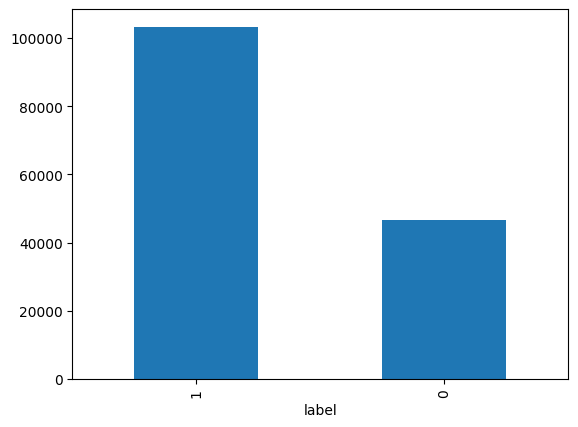

In [8]:
sample_data['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

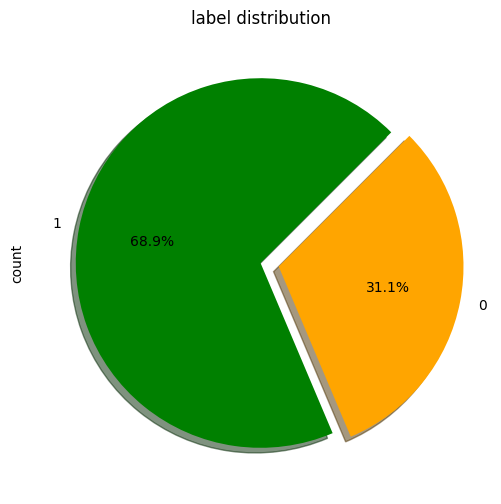

In [9]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
sample_data['label'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
LSTM

In [14]:
from tensorflow.keras.optimizers import RMSprop

# Adjust LSTM units and add an additional dense layer
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile with a smaller learning rate and RMSprop optimizer
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Enhanced Model with more epochs and early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_padded, y_train,
    epochs=75,  # Increase epochs for better learning
    batch_size=64,
    validation_data=(X_test_padded, y_test),
    callbacks=[early_stopping]
)

# Evaluate the Enhanced Model
y_pred = model.predict(X_test_padded)
y_pred = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Epoch 1/75
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1319s 702ms/step - accuracy: 0.7473 - loss: 0.6759 - val_accuracy: 0.8146 - val_loss: 0.4294
Epoch 2/75
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 713s 380ms/step - accuracy: 0.8271 - loss: 0.4127 - val_accuracy: 0.8291 - val_loss: 0.4019
Epoch 3/75
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 714s 381ms/step - accuracy: 0.8433 - loss: 0.3832 - val_accuracy: 0.8362 - val_loss: 0.3917
Epoch 4/75
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 724s 386ms/step - accuracy: 0.8591 - loss: 0.3539 - val_accuracy: 0.8440 - val_loss: 0.3769
Epoch 5/75
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 738s 393ms/step - accuracy: 0.8729 - loss: 0.3298 - val_accuracy: 0.8459 - val_loss: 0.3712
Epoch 6/75
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 722s 385ms/step - accuracy: 0.8841 - loss: 0.3055 - val_accuracy: 0.8556 - val_loss: 0.3619
Epoch 7/75
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 721s 385ms/step - accuracy: 0.8980 - loss: 0.2807 - val_accuracy: 0.8588 - val_loss: 0.3700
Epoch 8/75
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 723s 386ms/step - a

# SVM


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


sample_data['Text'] = sample_data['Text'].fillna('')

texts = sample_data['Text'].values
labels = sample_data['label'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.82


# naive_bayes


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

texts = sample_data['Text'].values
labels = sample_data['label'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features (words)

# Handle NaN values by replacing them with an empty string before fitting the vectorizer
X_train = [str(x) if not pd.isnull(x) else '' for x in X_train]
X_test = [str(x) if not pd.isnull(x) else '' for x in X_test]

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.78
